## Data Analytics
### Lab 4. - Linear models
Alicja Bogusz

In [73]:
import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True)  # only valid on Windows

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed
Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


True

We focus on models in the form:
$$\ y \sim {Normal}(\alpha+X\beta,\sigma) $$

In [74]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people
### Normal model - no predictors,
We will try to fit $\\{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [75]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


## Task 1. Prior predictive checks

In [76]:
model_ppc = CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/height_1_ppc info
cwd: None
12:05:46 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_ppc', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmpmp1iwugj/height_1_ppccegi4m2q/height_1_ppc-20230410120546.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


12:05:46 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_1_ppc', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmpmp1iwugj/height_1_ppccegi4m2q/height_1_ppc-20230410120546.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp1iwugj/height_1_ppccegi4m2q/height_1_ppc-20230410120546.csv
 console_msgs (if any):
	/tmp/tmpmp1iwugj/height_1_ppccegi4m2q/height_1_ppc-20230410120546_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Defau

1. Plot histograms of mu, sigma and simulated height.

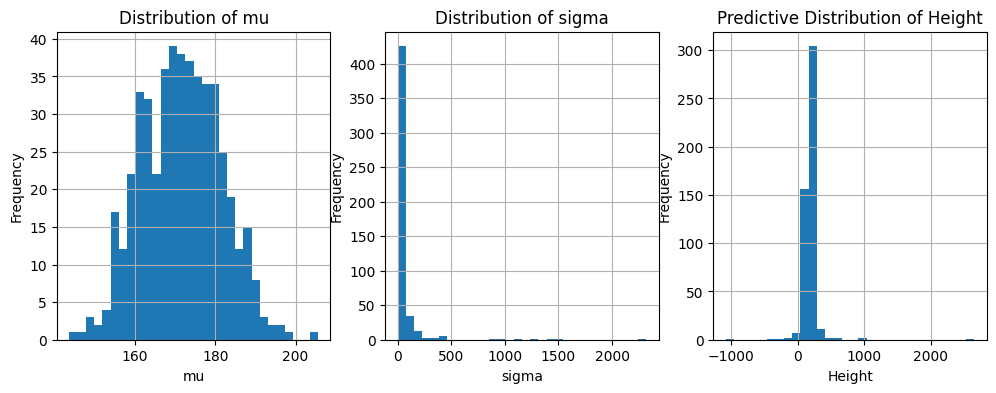

In [77]:
# Extract the parameters and posterior predictive samples
mu_samples = sim.stan_variable('mu')
sigma_samples = sim.stan_variable('sigma')
heights_predicted_samples = sim.stan_variable('height')

# Plot the histograms
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].hist(mu_samples, bins=30)
ax[0].set_xlabel('mu')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of mu')
ax[0].grid()

ax[1].hist(sigma_samples, bins=30)
ax[1].set_xlabel('sigma')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of sigma')
ax[1].grid()

ax[2].hist(heights_predicted_samples.flatten(), bins=30)
ax[2].set_xlabel('Height')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Predictive Distribution of Height')
ax[2].grid()

plt.show()

2. Plot a joint distribution of mu and sigma.

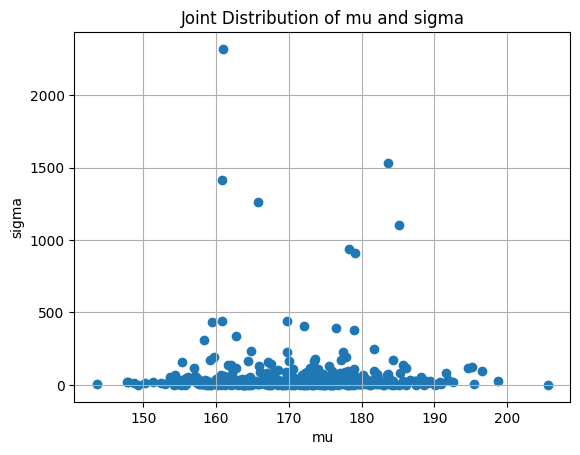

In [78]:
# Plot the joint distribution
plt.scatter(mu_samples, sigma_samples)
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Joint Distribution of mu and sigma')
plt.grid()
plt.show()

3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out.
5. Check if observed data is possible to obtain using priors.

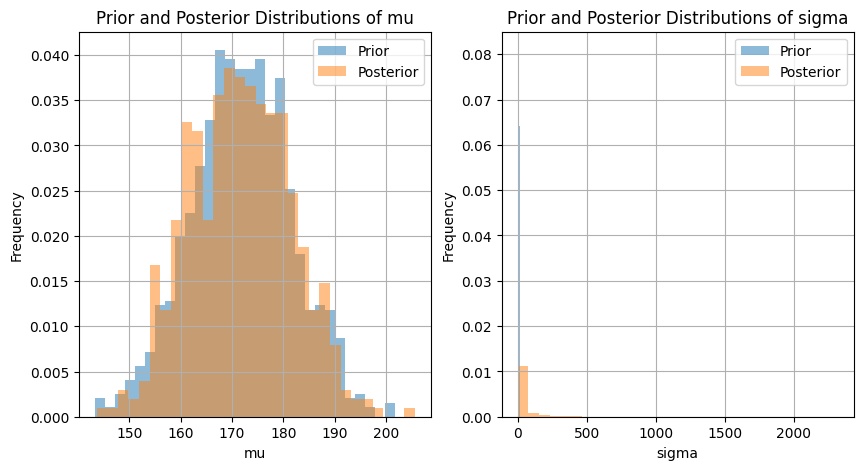

In [79]:
# Define the prior distributions for mu and sigma
mu_prior_mean = 172
mu_prior_sd = 10
sigma_prior_scale = 15

# Generate some samples from the prior distributions
mu_prior_samples = np.random.normal(mu_prior_mean, mu_prior_sd, size=1000)
sigma_prior_samples = np.random.uniform(0, sigma_prior_scale, size=1000)

# Plot the histograms of the prior and posterior distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(mu_prior_samples, bins=30, density=True, alpha=0.5, label='Prior')
ax[0].hist(mu_samples, bins=30, density=True, alpha=0.5, label='Posterior')
ax[0].set_xlabel('mu')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Prior and Posterior Distributions of mu')
ax[0].legend()
ax[0].grid()

ax[1].hist(sigma_prior_samples, bins=10, density=True, alpha=0.5, label='Prior')
ax[1].hist(sigma_samples, bins=30, density=True, alpha=0.5, label='Posterior')
ax[1].set_xlabel('sigma')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Prior and Posterior Distributions of sigma')
ax[1].legend()
ax[1].grid()

plt.show()


## Task 2. Model fit and evaluation

In [80]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [81]:
data=dict(N=len(d), heights=d.height.values)
data

{'N': 352,
 'heights': array([151.765 , 139.7   , 136.525 , 156.845 , 145.415 , 163.83  ,
        149.225 , 168.91  , 147.955 , 165.1   , 154.305 , 151.13  ,
        144.78  , 149.9   , 150.495 , 163.195 , 157.48  , 143.9418,
        161.29  , 156.21  , 146.4   , 148.59  , 147.32  , 147.955 ,
        161.925 , 146.05  , 146.05  , 152.7048, 142.875 , 142.875 ,
        147.955 , 160.655 , 151.765 , 162.8648, 171.45  , 147.32  ,
        147.955 , 154.305 , 143.51  , 146.7   , 157.48  , 165.735 ,
        152.4   , 141.605 , 158.8   , 155.575 , 164.465 , 151.765 ,
        161.29  , 154.305 , 145.415 , 145.415 , 152.4   , 163.83  ,
        144.145 , 153.67  , 142.875 , 167.005 , 158.4198, 165.735 ,
        149.86  , 154.94  , 160.9598, 161.925 , 147.955 , 159.385 ,
        148.59  , 136.525 , 158.115 , 144.78  , 156.845 , 179.07  ,
        170.18  , 146.05  , 147.32  , 162.56  , 152.4   , 160.02  ,
        149.86  , 142.875 , 167.005 , 159.385 , 154.94  , 162.56  ,
        152.4   , 170.18  

In [82]:
fit = model_1_fit.sample(data, seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp1iwugj/lw8jd107.json
DEBUG:cmdstanpy:cmd: /content/height_1_fit info
cwd: None
12:05:50 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/lw8jd107.json', 'output', 'file=/tmp/tmpmp1iwugj/height_1_fitwo2bpjdf/height_1_fit-20230410120550_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/lw8jd107.json', 'output', 'file=/tmp/tmpmp1iwugj/height_1_fitwo2bpjdf/height_1_fit-20230410120550_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/lw8jd107.json', 'output', 'file=/tmp/tmpmp1iwugj/height_1_fitwo2bpjdf/height_1_fit-20230410120550_3.

12:05:50 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_1_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/lw8jd107.json', 'output', 'file=/tmp/tmpmp1iwugj/height_1_fitwo2bpjdf/height_1_fit-20230410120550_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp1iwugj/height_1_fitwo2bpjdf/height_1_fit-20230410120550_1.csv
 console_msgs (if any):
	/tmp/tmpmp1iwugj/height_1_fitwo2bpjdf/height_1_fit-20230410120550_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

1. Plot a joint distribution of fitted mu and sigma.

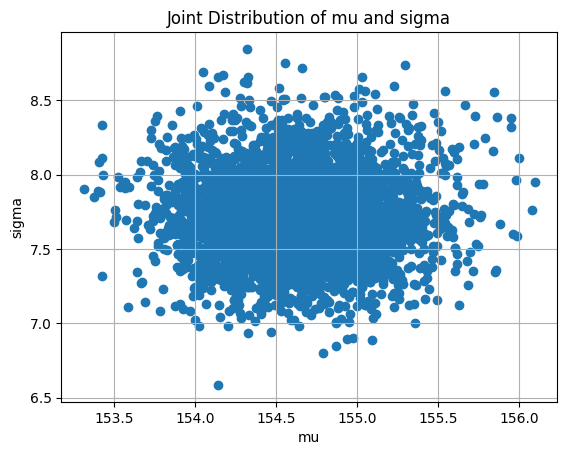

In [83]:
mu_fit = fit.stan_variable('mu')  # array of size M
sigma_fit = fit.stan_variable('sigma')  # array of size M

# create a joint plot of mu and sigma using a contour plot
plt.scatter(mu_fit, sigma_fit)
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Joint Distribution of mu and sigma')
plt.grid()
plt.show()

2. Plot histograms of data and simulated heights and evaluate the quality of model.

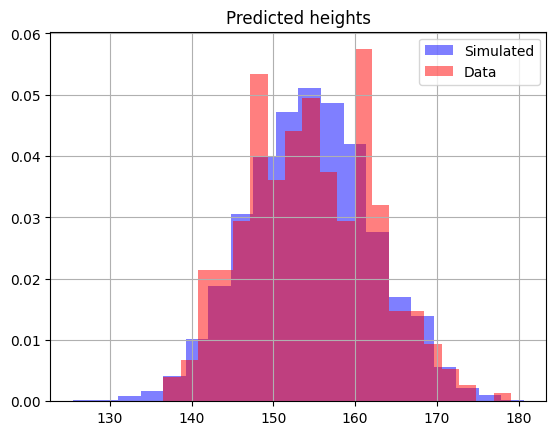

In [84]:
sampled_height = fit.stan_variable('sampled_height')

plt.hist(sampled_height, bins=20, alpha=0.5, color='blue', density=True, label='Simulated')
plt.hist(d.height, bins=20, alpha=0.5, color='red', density=True, label='Data')
plt.title('Predicted heights')
plt.legend()
plt.grid()
plt.show()

## Task 3. Adding predictor to the model - weight
Create column ```c_weight``` in the dataframe containing weights substracted by their mean.

In [85]:
d['c_weight'] = d['weight'] - d['weight'].mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
d

,height,weight,age,male,c_weight
0,151.765,47.825606,63.0,1,2.835121
1,139.700,36.485807,63.0,0,-8.504679
2,136.525,31.864838,65.0,0,-13.125648
3,156.845,53.041914,41.0,1,8.051429
4,145.415,41.276872,51.0,0,-3.713614
...,...,...,...,...,...
534,162.560,47.031821,27.0,0,2.041335
537,142.875,34.246196,31.0,0,-10.744290
540,162.560,52.163080,31.0,1,7.172594
541,156.210,54.062497,21.0,0,9.072011


## Task 4. Prior predictive checks

In [86]:
model_ppc_2a = CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim_2a = model_ppc_2a.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp1iwugj/o46x0ec7.json
DEBUG:cmdstanpy:cmd: /content/height_2a_ppc info
cwd: None
12:05:52 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2a_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpmp1iwugj/o46x0ec7.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2a_ppc0mwyxhei/height_2a_ppc-20230410120552.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


12:05:52 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_2a_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpmp1iwugj/o46x0ec7.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2a_ppc0mwyxhei/height_2a_ppc-20230410120552.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp1iwugj/height_2a_ppc0mwyxhei/height_2a_ppc-20230410120552.csv
 console_msgs (if any):
	/tmp/tmpmp1iwugj/height_2a_ppc0mwyxhei/height_2a_ppc-20230410120552_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0

Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

In [87]:
# Extract posterior samples for alpha and beta
alpha_samples_a = sim_2a.stan_variable('alpha')
beta_samples_a = sim_2a.stan_variable('beta')

# Create a range of weights to plot the lines
weights = np.linspace(d.c_weight.min(),d.c_weight.max())

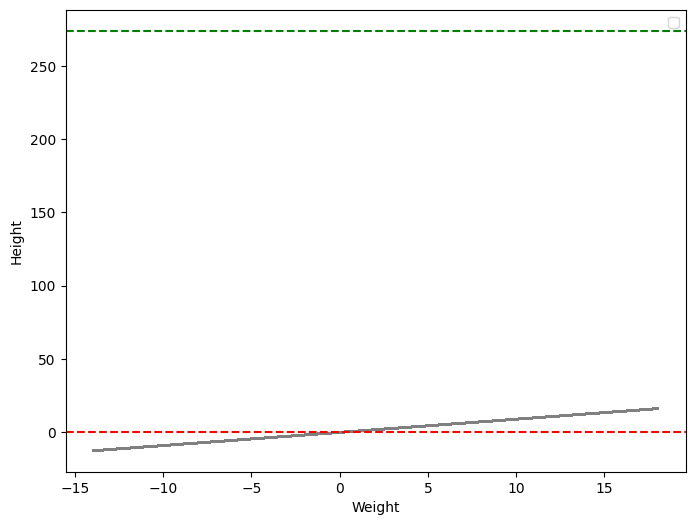

In [88]:
# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot lines for each sampled slope and intercept
for i in range(len(alpha_samples_a)):
    alpha = alpha_samples_a[i]
    beta = beta_samples_a[i]
    x = weights
    y = alpha + beta * x
    ax.plot(x, y, color="gray", alpha=0.1)

# Add mean line
alpha_mean = np.mean(alpha_samples_a)
beta_mean = np.mean(beta_samples_a)
x = np.linspace(0, 100, 100)
y = alpha_mean + beta_mean * x
# ax.plot(x, y, color="red", label="Mean line")

# Add legend and labels
ax.legend()
ax.set_xlabel("Weight")
ax.set_ylabel("Height")

plt.axhline(y=0, color='r', linestyle='--', label='Minimum height')
plt.axhline(y=274, color='g', linestyle='--', label='Maximum height')

# Show plot
plt.show()


## Task 5. Modifying prior
If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.

In [89]:
model_ppc_2b = CmdStanModel(stan_file='height_2b_ppc.stan')
sim_2b = model_ppc_2b.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp1iwugj/52526ck4.json
DEBUG:cmdstanpy:cmd: /content/height_2b_ppc info
cwd: None
12:05:54 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2b_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpmp1iwugj/52526ck4.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2b_ppc4hub0z97/height_2b_ppc-20230410120554.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


12:05:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_2b_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpmp1iwugj/52526ck4.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2b_ppc4hub0z97/height_2b_ppc-20230410120554.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp1iwugj/height_2b_ppc4hub0z97/height_2b_ppc-20230410120554.csv
 console_msgs (if any):
	/tmp/tmpmp1iwugj/height_2b_ppc4hub0z97/height_2b_ppc-20230410120554_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0

1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

In [90]:
# Extract posterior samples for alpha and beta
alpha_samples_b = sim_2b.stan_variable('alpha')
beta_samples_b = sim_2b.stan_variable('beta')

# Create a range of weights to plot the lines
weights = np.linspace(d.c_weight.min(),d.c_weight.max())

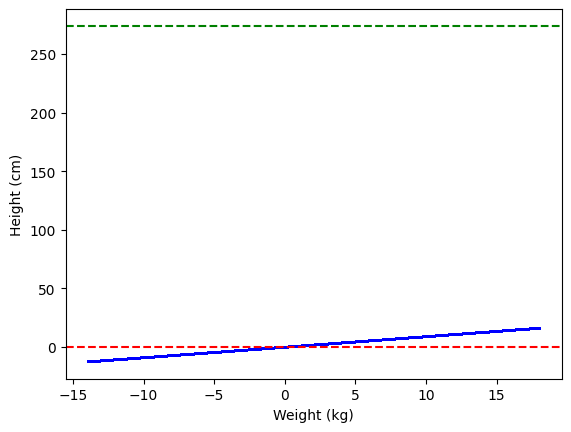

In [91]:
# Initialize a figure
fig, ax = plt.subplots()

# Plot each sampled line
for i in range(alpha_samples_b.shape[0]):
    alpha = alpha_samples_b[i]
    beta = beta_samples_b[i]
    predicted_heights = alpha + beta * weights
    ax.plot(weights, predicted_heights, alpha=0.1, color='b')

# plot minimum and maximum heights observed in nature
plt.axhline(y=0, color='r', linestyle='--', label='Minimum height')
plt.axhline(y=274, color='g', linestyle='--', label='Maximum height')

ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Height (cm)')

# Show the plot
plt.show()

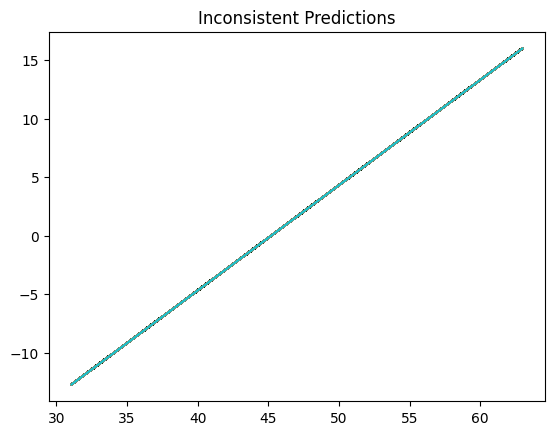

In [92]:
# Define the minimum and maximum heights observed in nature
min_height = 0
max_height = 272

# Plot the lines for each sampled slope and intercept
for i in range(len(alpha_samples_b)):
    alpha = alpha_samples_b[i]
    beta = beta_samples_b[i]
    height = alpha + beta * np.linspace(d['c_weight'].min(), d['c_weight'].max())
    plt.plot(np.linspace(d['weight'].min(), d['weight'].max()), height)
    # Check if the predicted heights are consistent with the minimum and maximum heights observed in nature
    predicted_min_height = alpha
    predicted_max_height = alpha + beta * (d['weight'].max() - d['weight'].mean())
    if predicted_min_height < min_height or predicted_max_height > max_height:
        plt.title('Inconsistent Predictions')
    else:
        plt.title('Consistent Predictions')

plt.show()


## Task 6. Fitting and evaluating model

In [93]:
model_2_fit = CmdStanModel(stan_file='height_2_fit.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


1. Create ```data_fit``` dictionary containing data from ```N``` first rows of dataframe

In [94]:
N=50
data_fit=dict(N=N, heights=d.height.values[:N], weight=d.weight.values[:N])

data_fit

{'N': 50,
 'heights': array([151.765 , 139.7   , 136.525 , 156.845 , 145.415 , 163.83  ,
        149.225 , 168.91  , 147.955 , 165.1   , 154.305 , 151.13  ,
        144.78  , 149.9   , 150.495 , 163.195 , 157.48  , 143.9418,
        161.29  , 156.21  , 146.4   , 148.59  , 147.32  , 147.955 ,
        161.925 , 146.05  , 146.05  , 152.7048, 142.875 , 142.875 ,
        147.955 , 160.655 , 151.765 , 162.8648, 171.45  , 147.32  ,
        147.955 , 154.305 , 143.51  , 146.7   , 157.48  , 165.735 ,
        152.4   , 141.605 , 158.8   , 155.575 , 164.465 , 151.765 ,
        161.29  , 154.305 ]),
 'weight': array([47.8256065, 36.4858065, 31.864838 , 53.0419145, 41.276872 ,
        62.992589 , 38.2434755, 55.4799715, 34.869885 , 54.487739 ,
        49.89512  , 41.220173 , 36.0322145, 47.7      , 33.849303 ,
        48.5626935, 42.3258035, 38.3568735, 48.987936 , 42.7226965,
        35.493574 , 37.9032815, 35.4652245, 40.312989 , 55.111428 ,
        37.5063885, 38.498621 , 46.606578 , 38.838815 ,

In [95]:
fit_2=model_2_fit.sample(data=data_fit,seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp1iwugj/f6gfze9l.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
12:05:58 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/f6gfze9l.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fitd7tkt1za/height_2_fit-20230410120558_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/f6gfze9l.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fitd7tkt1za/height_2_fit-20230410120558_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/f6gfze9l.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fitd7tkt1za/height_2_fit-20230410120558_3.

12:06:00 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/f6gfze9l.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fitd7tkt1za/height_2_fit-20230410120558_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp1iwugj/height_2_fitd7tkt1za/height_2_fit-20230410120558_1.csv
 console_msgs (if any):
	/tmp/tmpmp1iwugj/height_2_fitd7tkt1za/height_2_fit-20230410120558_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)

In [96]:
# Extract alpha and beta samples
alpha_samples_fit2 = fit_2.stan_variable("alpha")
beta_samples_fit2 = fit_2.stan_variable("beta")

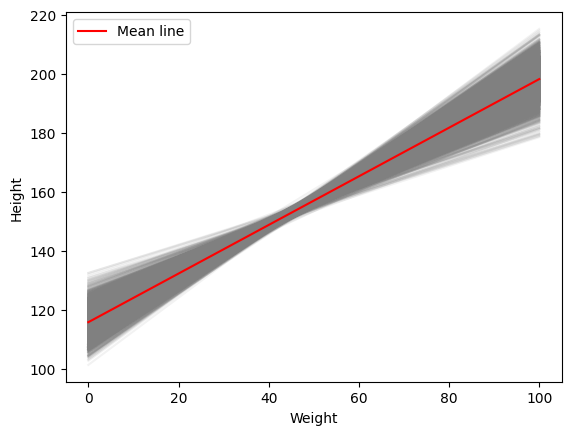

In [97]:
# Create plot
fig, ax = plt.subplots()

# Plot lines for each sampled slope and intercept
for i in range(len(alpha_samples_fit2)):
    alpha = alpha_samples_fit2[i]
    beta = beta_samples_fit2[i]
    x = np.linspace(0, 100, 100)
    y = alpha + beta * x
    ax.plot(x, y, color="gray", alpha=0.1)

# Add mean line
alpha_mean = np.mean(alpha_samples_fit2)
beta_mean = np.mean(beta_samples_fit2)
x = np.linspace(0, 100, 100)
y = alpha_mean + beta_mean * x
ax.plot(x, y, color="red", label="Mean line")

# Add legend and labels
ax.legend()
ax.set_xlabel("Weight")
ax.set_ylabel("Height")

# Show plot
plt.show()


2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use errorbar from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.

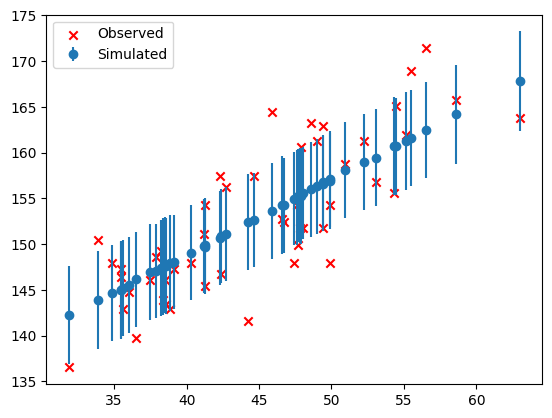

In [98]:
# Generate simulated heights from the posterior model
heights_sim = fit_2.stan_variable("height")

# Calculate mean and standard deviation of simulated heights for each value of weight
mean_sim = heights_sim.mean(axis=0)
std_sim = heights_sim.std(axis=0)

# Plot mean simulated height and one standard deviation error bars
fig, ax = plt.subplots()
ax.errorbar(data_fit["weight"], mean_sim, yerr=std_sim, fmt="o", label="Simulated")
ax.scatter(data_fit["weight"], data_fit["heights"], marker="x", color="r", label="Observed")
ax.legend()
plt.show()


## Task 7. Extending the model
1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of 
 in such case?


In [99]:
d

,height,weight,age,male,c_weight
0,151.765,47.825606,63.0,1,2.835121
1,139.700,36.485807,63.0,0,-8.504679
2,136.525,31.864838,65.0,0,-13.125648
3,156.845,53.041914,41.0,1,8.051429
4,145.415,41.276872,51.0,0,-3.713614
...,...,...,...,...,...
534,162.560,47.031821,27.0,0,2.041335
537,142.875,34.246196,31.0,0,-10.744290
540,162.560,52.163080,31.0,1,7.172594
541,156.210,54.062497,21.0,0,9.072011


In [100]:
N = 50
data_fit_2=dict(N=N, heights=d.height.values[:N], weight=d.c_weight.values[:N])

fit_2_new = model_2_fit.sample(data=data_fit_2,seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp1iwugj/u2y7sljz.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
12:06:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/u2y7sljz.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fit4n7o8c5j/height_2_fit-20230410120610_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/u2y7sljz.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fit4n7o8c5j/height_2_fit-20230410120610_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/u2y7sljz.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fit4n7o8c5j/height_2_fit-20230410120610_3.

12:06:11 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpmp1iwugj/u2y7sljz.json', 'output', 'file=/tmp/tmpmp1iwugj/height_2_fit4n7o8c5j/height_2_fit-20230410120610_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp1iwugj/height_2_fit4n7o8c5j/height_2_fit-20230410120610_1.csv
 console_msgs (if any):
	/tmp/tmpmp1iwugj/height_2_fit4n7o8c5j/height_2_fit-20230410120610_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the ```model``` to avoid necessity of a for loop in the model block.